In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/CloudWatch_Traffic_Web_Attack.csv')

In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [ ]:
missing_values = df.isnull().sum()

In [ ]:
 df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)
 df.dropna(subset=['src_ip', 'dst_ip'], inplace=True)

<ipython-input-9-028d5a279e27>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)


In [ ]:
 df['creation_time'] = pd.to_datetime(df['creation_time'])
 df['end_time'] = pd.to_datetime(df['end_time'])

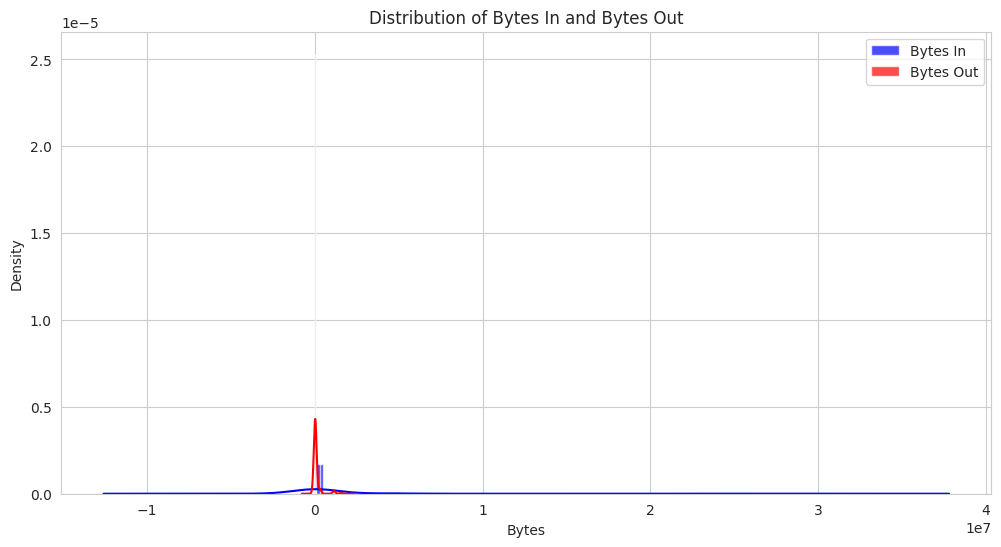

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))

# Plot histogram for 'bytes_in'
df['bytes_in'].plot.hist(bins=50, color='blue', alpha=0.7, label='Bytes In', density=True)
df['bytes_in'].plot.kde(color='blue', label='_nolegend_')  # KDE for 'bytes_in'

# Plot histogram for 'bytes_out'
df['bytes_out'].plot.hist(bins=50, color='red', alpha=0.7, label='Bytes Out', density=True)
df['bytes_out'].plot.kde(color='red', label='_nolegend_')  # KDE for 'bytes_out'


plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.xlabel('Bytes')
plt.ylabel('Density')
plt.show()

<ipython-input-12-2bdef3596fc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df, palette='viridis')


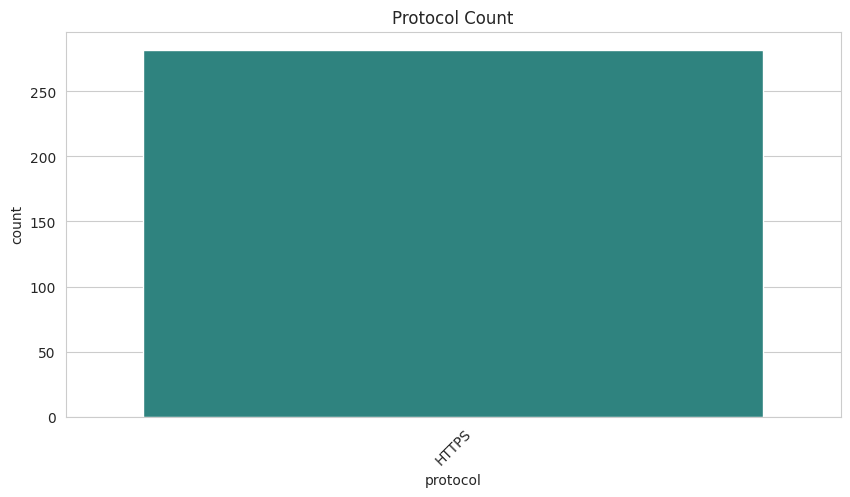

In [ ]:
import seaborn as sns # import the seaborn library and assign it to the alias 'sns'

plt.figure(figsize=(10, 5))
sns.countplot(x='protocol', data=df, palette='viridis')
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Duration of the session in seconds
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

# Average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']

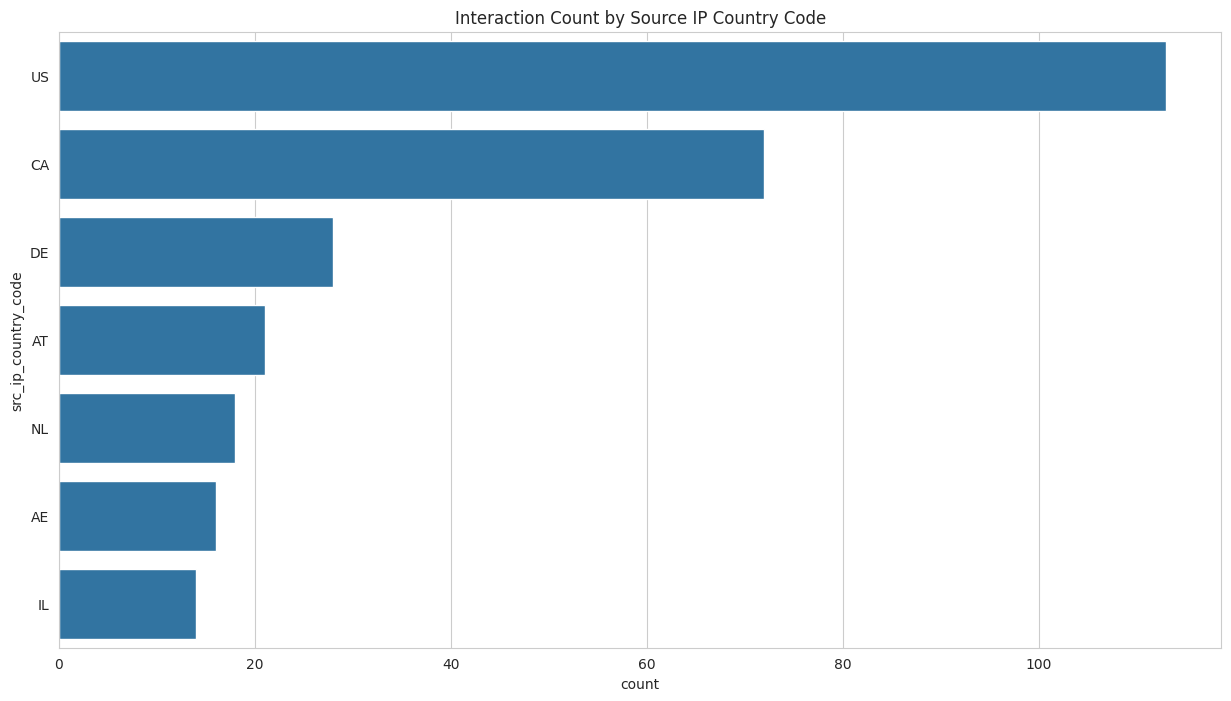

In [ ]:
 plt.figure(figsize=(15, 8))
 sns.countplot(y='src_ip_country_code', data=df,
 order=df['src_ip_country_code'].value_counts().index)
 plt.title('Interaction Count by Source IP Country Code')
 plt.show()

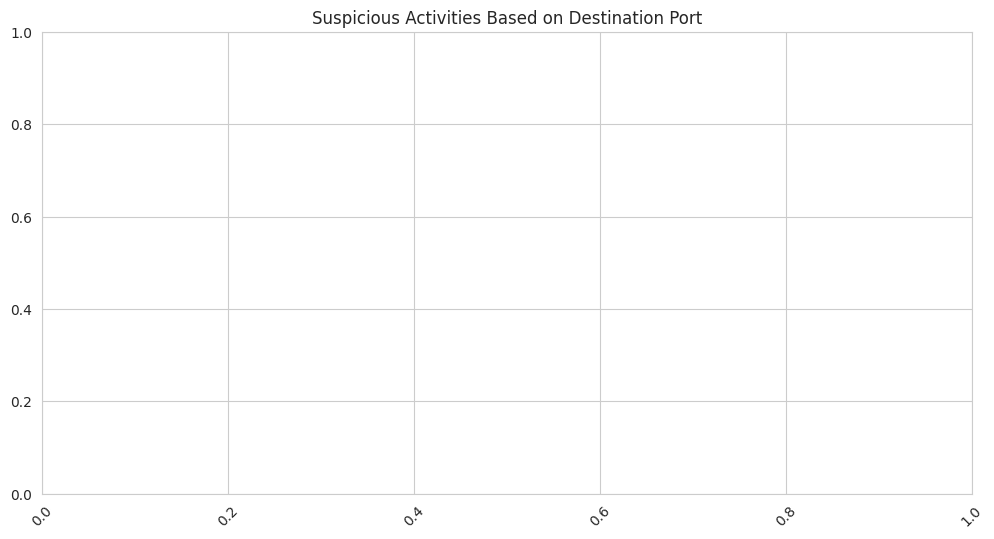

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dst_port', data=df[df['detection_types'] ==
'Suspicious'], palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
# Selecting features for anomaly detection
features = df[['bytes_in', 'bytes_out', 'session_duration',
'avg_packet_size']]
# Initialize the model
model = IsolationForest(contamination=0.05, random_state=42)
# Fit and predict anomalies
df['anomaly'] = model.fit_predict(features)
df['anomaly'] = df['anomaly'].apply(lambda x: 'Suspicious' if x
==-1 else 'Normal')

In [ ]:
# Check the proportion of anomalies detected
print(df['anomaly'].value_counts())
# Display anomaly samples
suspicious_activities = df[df['anomaly'] == 'Suspicious']
print(suspicious_activities.head())

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64
     bytes_in  bytes_out             creation_time                  end_time  \
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
87    1215594      64362 2024-04-26 00:30:00+00:00 2024-04-26 00:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
132   1889834      34306 2024-04-26 01:20:00+00:00 2024-04-26 01:30:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   

             src_ip src_ip_country_code protocol  response.code  dst_port  \
36    155.91.45.242                  US    HTTPS            200       443   
87   165.225.240.79                  NL    HTTPS            200       443   
116   155.91.45.242                  US    HTTPS            200       443   
132  165.225.240.79                  NL    HTTPS            200       443   
153   155.91.45.242                  US    HTTPS            200 

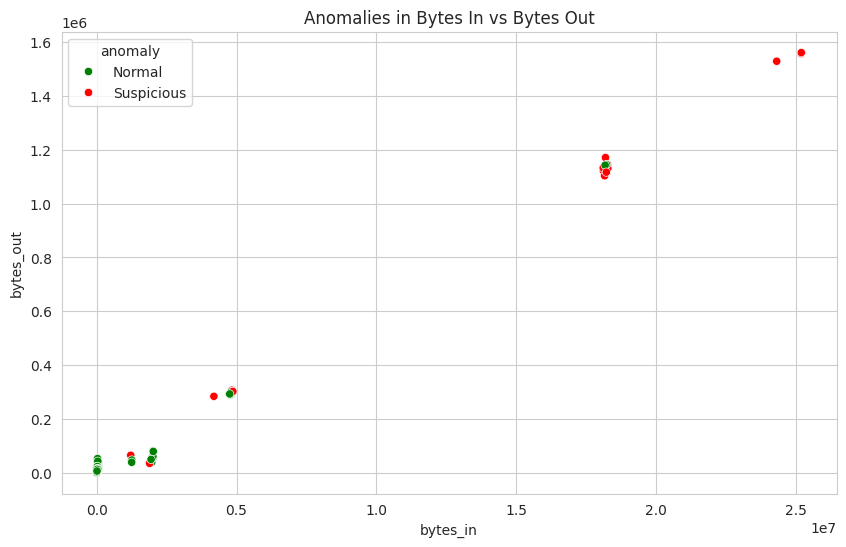

In [ ]:
 # Visualize bytes_in vs bytes_out with anomalies highlighted
 plt.figure(figsize=(10, 6))
 sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly',
 data=df, palette=['green', 'red'])
 plt.title('Anomalies in Bytes In vs Bytes Out')
 plt.show()

In [ ]:
df_unique = df.drop_duplicates()

In [ ]:
df_unique = df.drop_duplicates()

In [ ]:
df_unique['creation_time'] = pd.to_datetime(df_unique['creation_time'])
df_unique['end_time'] = pd.to_datetime(df_unique['end_time'])
df_unique['time'] = pd.to_datetime(df_unique['time'])
df_unique['time'] = pd.to_datetime(df_unique['time'])

In [ ]:
df_unique['src_ip_country_code'] =df_unique['src_ip_country_code'].str.upper()

In [ ]:
print("Unique Datasets Information:")
df_unique.info()

Unique Datasets Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object            

In [ ]:
 print("Top 5 Unique Datasets Information:")
 df_unique.head()

Top 5 Unique Datasets Information:


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,anomaly
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,30.986667,Normal
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,81.830000,Normal
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,69.956667,Normal
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,74.706667,Normal
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,34.030000,Normal


In [ ]:
df_unique['duration_seconds'] = (df_unique['end_time'] - df_unique['creation_time']).dt.total_seconds()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[['bytes_in',
'bytes_out', 'duration_seconds']])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])

In [ ]:
scaled_columns = ['scaled_bytes_in', 'scaled_bytes_out','scaled_duration_seconds']
encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])

In [ ]:
scaled_df = pd.DataFrame(scaled_features,
columns=scaled_columns, index=df_unique.index)
encoded_df = pd.DataFrame(encoded_features,
columns=encoded_columns, index=df_unique.index)

In [ ]:
transformed_df=pd.concat([df_unique,scaled_df,encoded_df],axis=1)

In [ ]:
transformed_df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,scaled_bytes_in,scaled_bytes_out,scaled_duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,-0.288219,-0.281223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,-0.282108,-0.260804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,-0.282689,-0.279344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,-0.282197,-0.276161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,-0.287996,-0.277678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
numeric_df = transformed_df.select_dtypes(include=['float64','int64'])
correlation_matrix_numeric = numeric_df.corr()

In [ ]:
 correlation_matrix_numeric

,bytes_in,bytes_out,response.code,dst_port,session_duration,avg_packet_size,duration_seconds,scaled_bytes_in,scaled_bytes_out,scaled_duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
bytes_in,1.000000,0.997705,NaN,NaN,NaN,0.999992,NaN,1.000000,0.997705,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
bytes_out,0.997705,1.000000,NaN,NaN,NaN,0.997963,NaN,0.997705,1.000000,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
response.code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
session_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_packet_size,0.999992,0.997963,NaN,NaN,NaN,1.000000,NaN,0.999992,0.997963,NaN,-0.070677,-0.081687,-0.166109,-0.095036,-0.066045,-0.009075,0.316730
duration_seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scaled_bytes_in,1.000000,0.997705,NaN,NaN,NaN,0.999992,NaN,1.000000,0.997705,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
scaled_bytes_out,0.997705,1.000000,NaN,NaN,NaN,0.997963,NaN,0.997705,1.000000,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
scaled_duration_seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


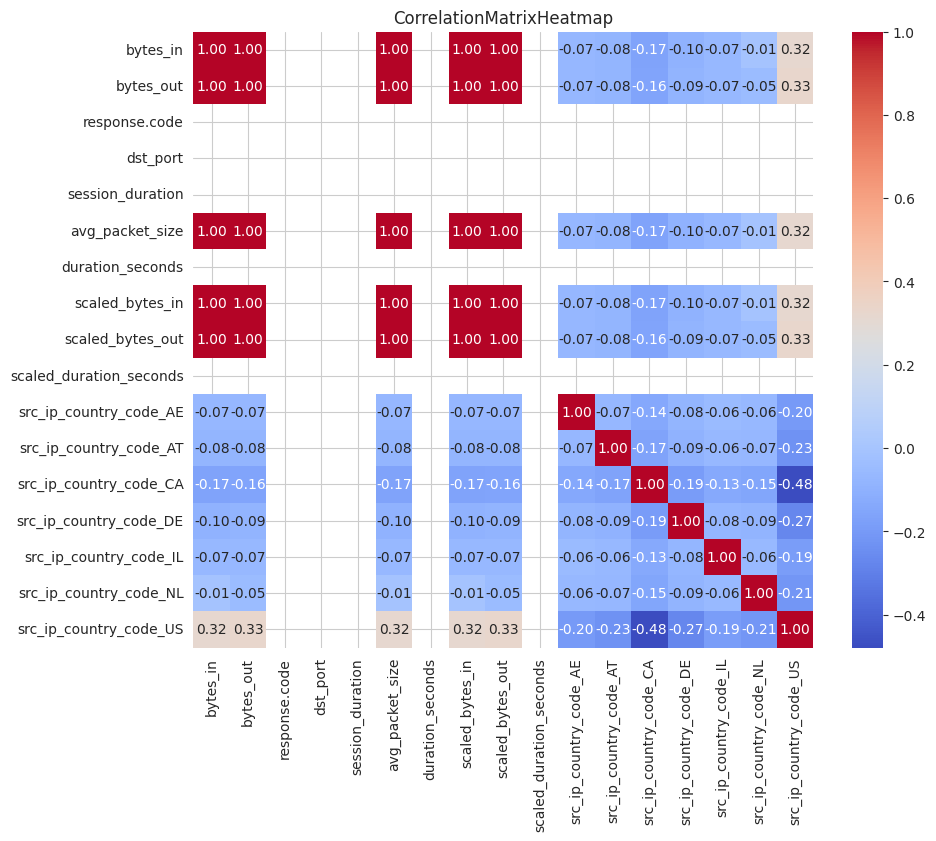

In [ ]:
import matplotlib.pyplot as plt  # Import the necessary module
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_numeric,annot=True,fmt=".2f",
cmap='coolwarm')
plt.title('CorrelationMatrixHeatmap')
plt.show()

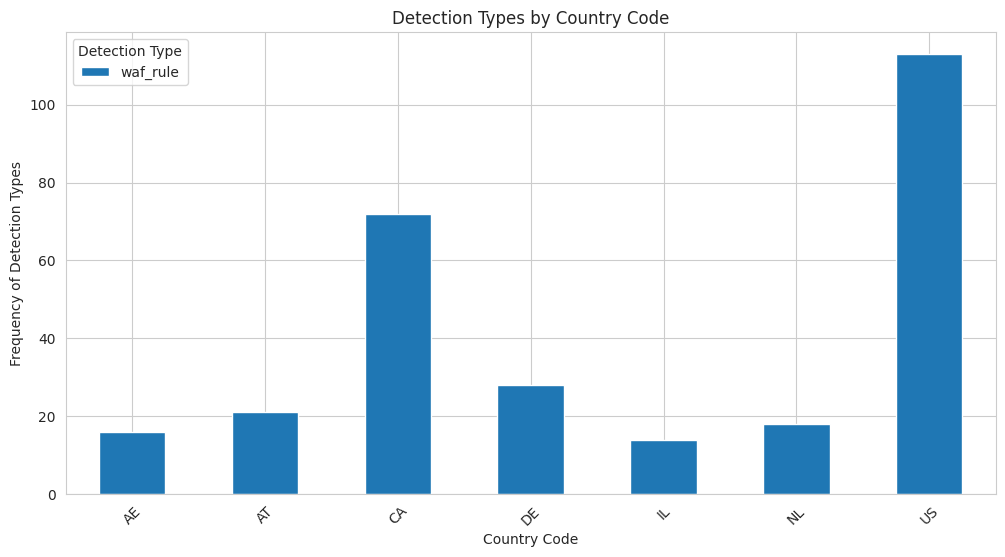

In [ ]:
   # Stacked Bar Chart for Detection Types by Country
 # Preparing data for stacked bar chart
detection_types_by_country = pd.crosstab(transformed_df['src_ip_country_code'],transformed_df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True,figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

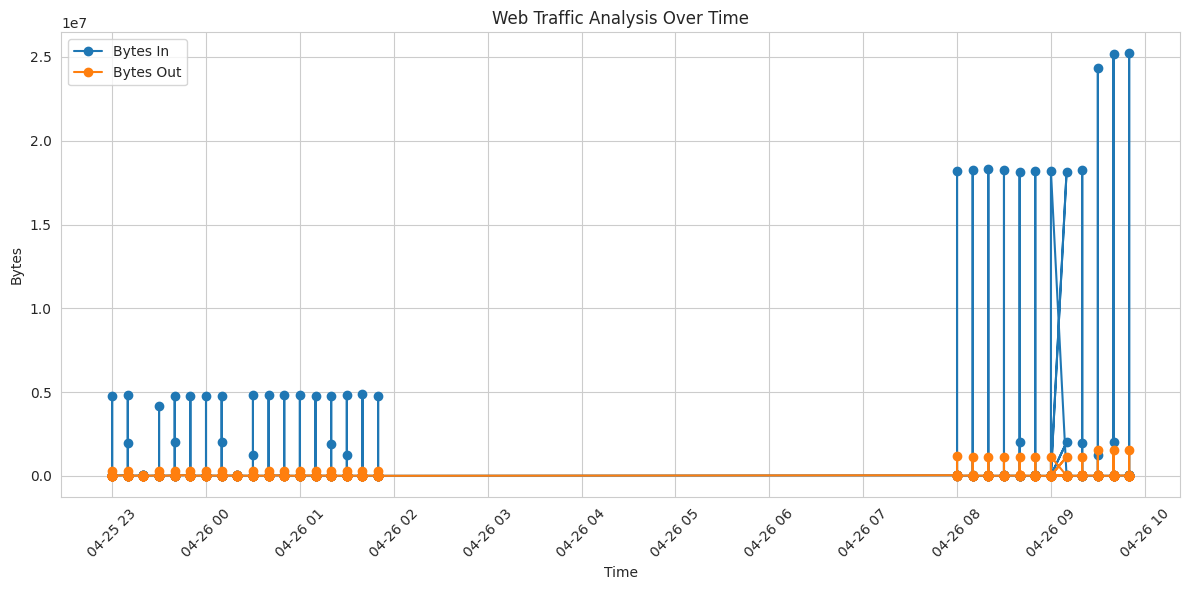

In [ ]:
#Convert 'creation_time' to datetime format
transformed_df['creation_time'] = pd.to_datetime(transformed_df['creation_time']) # Changed 'data' to 'transformed_df'
# Set 'creation_time' as the index
transformed_df.set_index('creation_time', inplace=True) # Changed 'data' to 'transformed_df'
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(transformed_df.index, transformed_df['bytes_in'], label='Bytes In', marker='o') # Changed 'data' to 'transformed_df'
plt.plot(transformed_df.index, transformed_df['bytes_out'], label='Bytes Out', marker='o') # Changed 'data' to 'transformed_df'
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

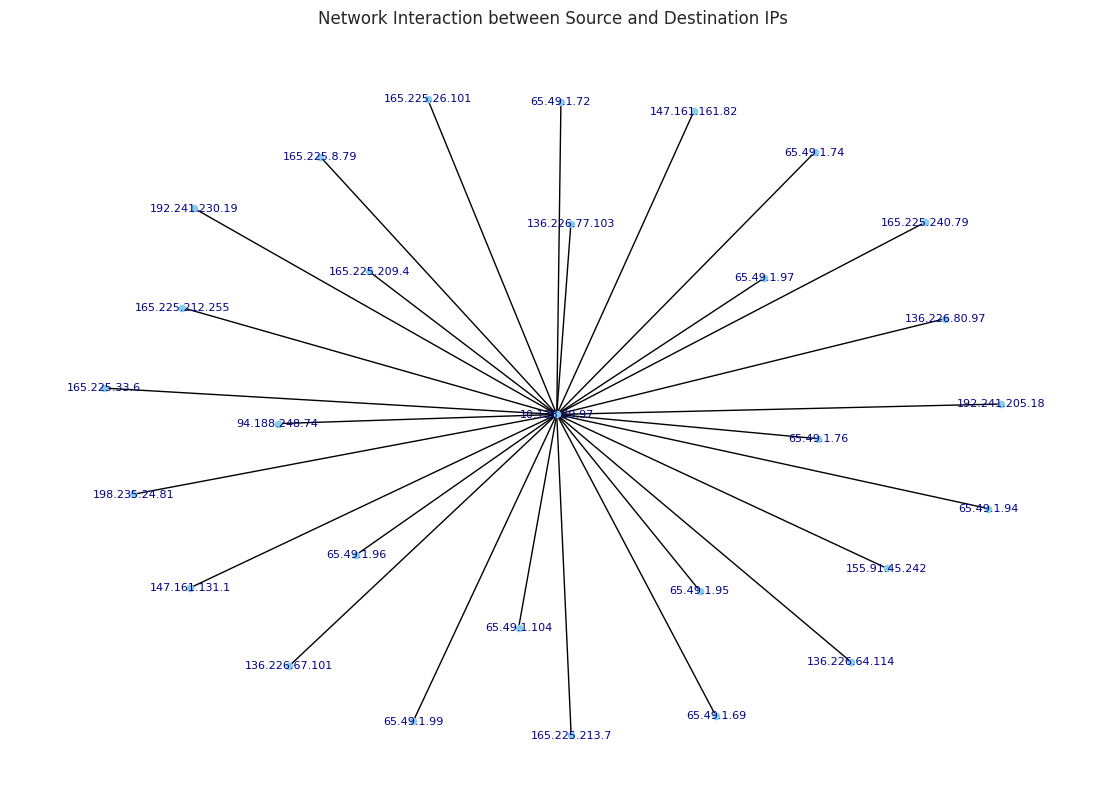

In [ ]:
# Create a graph
import networkx as nx
G = nx.Graph()
# Add edges from source IP to destination IP
for idx, row in transformed_df.iterrows():  # Change 'data' to 'transformed_df'
    G.add_edge(row['src_ip'], row['dst_ip'])
# Draw the network graph
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, with_labels=True, node_size=20,font_size=8, node_color='skyblue', font_color='darkblue')
plt.title('Network Interaction between Source and Destination IPs')
plt.axis('off') # Turn off the axis
# Show the plot
plt.show()

In [ ]:
# First, encode this column into binary labels
transformed_df['is_suspicious'] = (transformed_df['detection_types'] == 'waf_rule').astype(int)
# Features and Labels
X = transformed_df[['bytes_in', 'bytes_out', 'scaled_duration_seconds']]  # Numeric features
y = transformed_df['is_suspicious']  # Binary labels

In [ ]:
# Import the necessary function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,
random_state=42)
# Train the model
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Import the necessary functions
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [ ]:
transformed_df['is_suspicious'] = (transformed_df['detection_types'] == 'waf_rule').astype(int)  # Replace 'data' with 'transformed_df'
# Features and labels
X = transformed_df[['bytes_in', 'bytes_out']].values  # Using only numeric features and 'transformed_df'
y = transformed_df['is_suspicious'].values  # Using 'transformed_df'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Neural network model
# Make sure to import necessary libraries like tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=8, verbose=1)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 0.6393
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.5418
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4261
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3121
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2123
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1506
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1054
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0770
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0523
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0413
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0353 
Test Accuracy: 100.00%


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6546 - loss: 0.6688 - val_accuracy: 1.0000 - val_loss: 0.5616
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.5614 - val_accuracy: 1.0000 - val_loss: 0.4769
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.4936 - val_accuracy: 1.0000 - val_loss: 0.4019
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.4277 - val_accuracy: 1.0000 - val_loss: 0.3265
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.3431 - val_accuracy: 1.0000 - val_loss: 0.2499
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.2646 - val_accuracy: 1.0000 - val_loss: 0.1792
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.1728 - val_accuracy: 1.0000 - val_loss: 0.1208
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1297 - val_accuracy: 1.0000 - val_loss: 0.0775


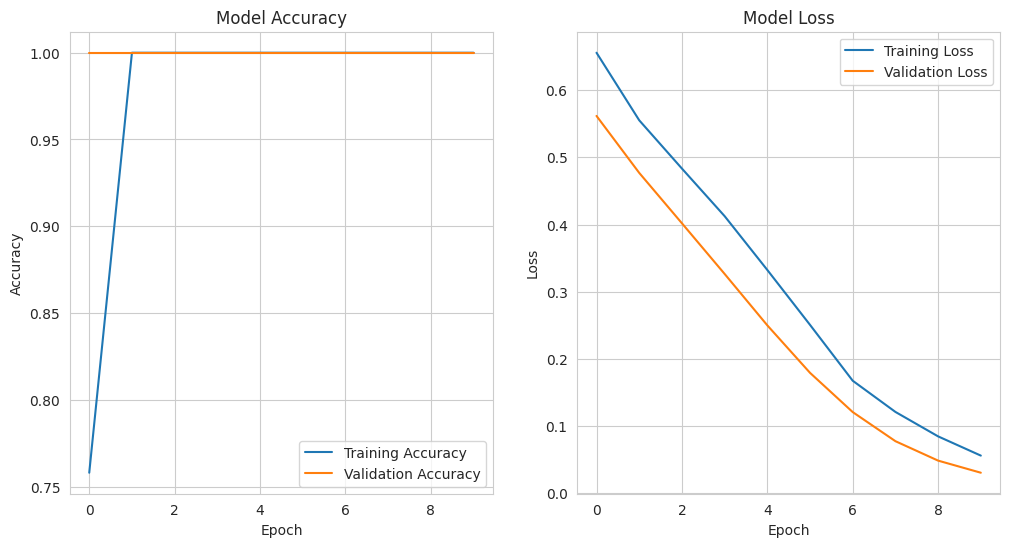

In [ ]:
# Neural network model
from tensorflow.keras.layers import Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy') # Fixed the label
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Fixed the label
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.1334 - loss: 0.7383 - val_accuracy: 0.8500 - val_loss: 0.7147
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7022 - loss: 0.6862 - val_accuracy: 0.9000 - val_loss: 0.6573
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9607 - loss: 0.6391 - val_accuracy: 1.0000 - val_loss: 0.6058
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9793 - loss: 0.6056 - val_accuracy: 1.0000 - val_loss: 0.5591
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.5661 - val_accuracy: 1.0000 - val_loss: 0.5164
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.5354 - val_accuracy: 1.0000 - val_loss: 0.4741
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9966 - loss: 0.4881 - val_accuracy: 1.0000 - val_loss: 0.4294
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.4436 - val_accuracy: 1.0000 - val_loss: 0.3819
Epoch 9/10


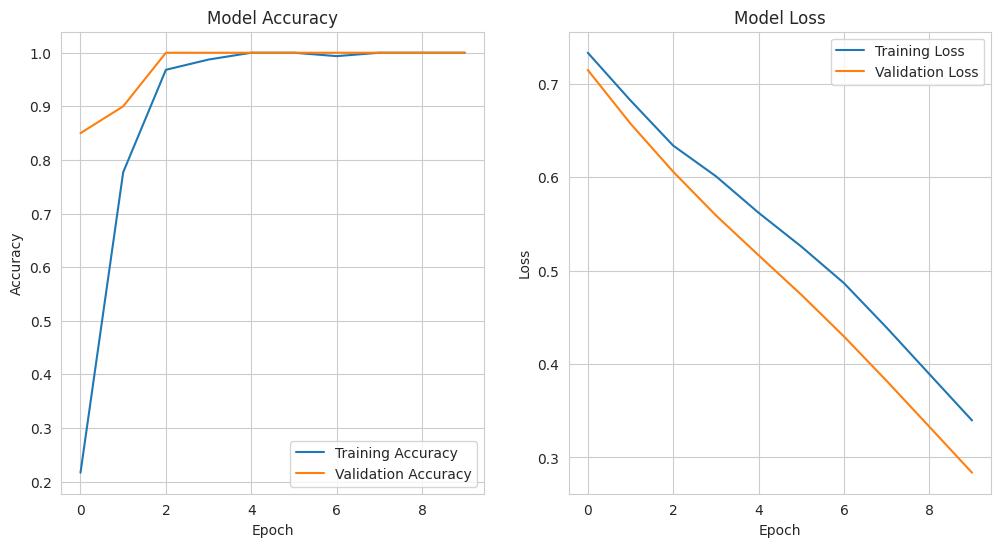

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten  # Import Conv1D and Flatten
from tensorflow.keras.optimizers import Adam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
# Adjusting the network to accommodate the input size
model = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

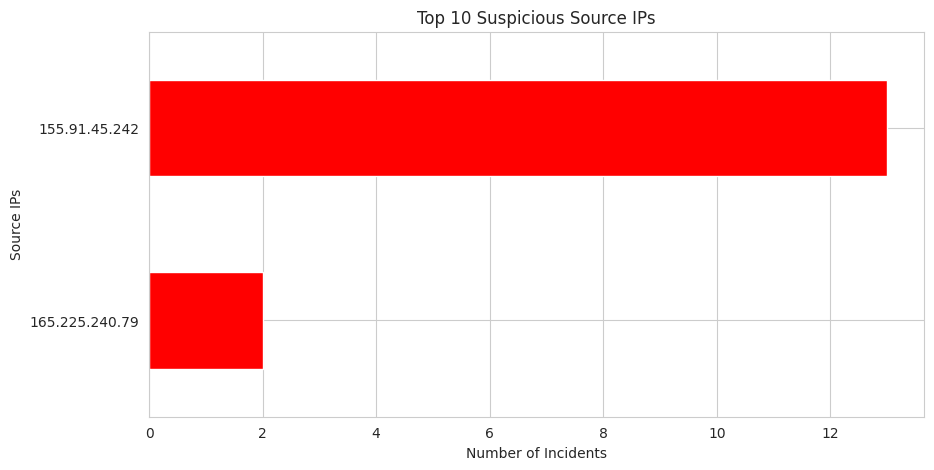

In [ ]:
import seaborn as sns
# Set plot style
sns.set_style("whitegrid")

# Top 10 Suspicious IPs based on anomaly detection
# Filter for suspicious activities and get the top 10 src_ip
top_suspicious_ips = df[df['anomaly'] == 'Suspicious']['src_ip'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_suspicious_ips.sort_values().plot(kind='barh', color='red')
plt.xlabel("Number of Incidents")
plt.ylabel("Source IPs")
plt.title("Top 10 Suspicious Source IPs")
plt.show()



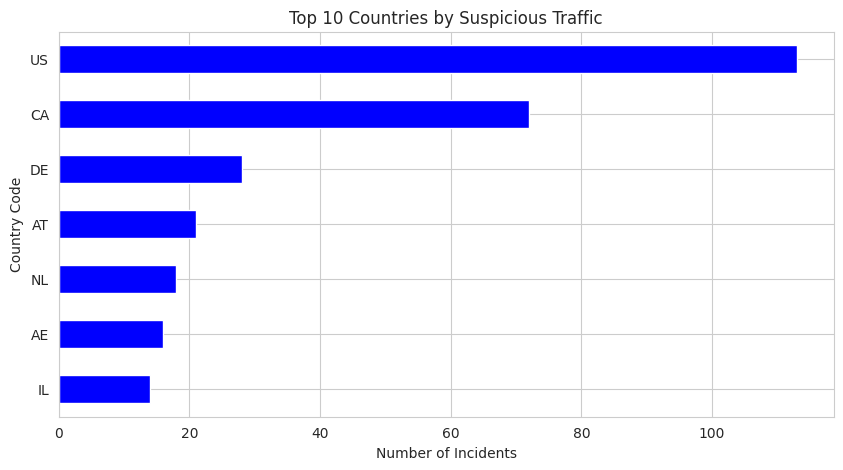

In [ ]:
# Top 10 Country-Based Attack Distribution
plt.figure(figsize=(10, 5))
df['src_ip_country_code'].value_counts().head(10).sort_values().plot(kind='barh', color='blue')
plt.xlabel("Number of Incidents")
plt.ylabel("Country Code")
plt.title("Top 10 Countries by Suspicious Traffic")
plt.show()

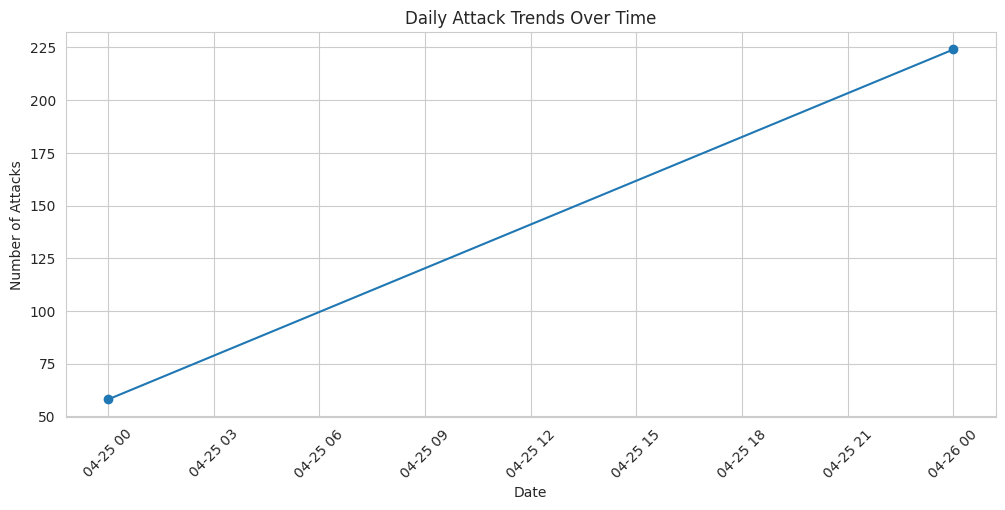

In [ ]:
# Time-Series Attack Trends
df_time_series = df.groupby(df['creation_time'].dt.date).size()  # Use 'creation_time' instead of 'time'
plt.figure(figsize=(12, 5))
df_time_series.plot(marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Attacks")
plt.title("Daily Attack Trends Over Time")
plt.xticks(rotation=45)
plt.show()

<ipython-input-48-1bb7cdaaacd7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['response.code'], palette="viridis")


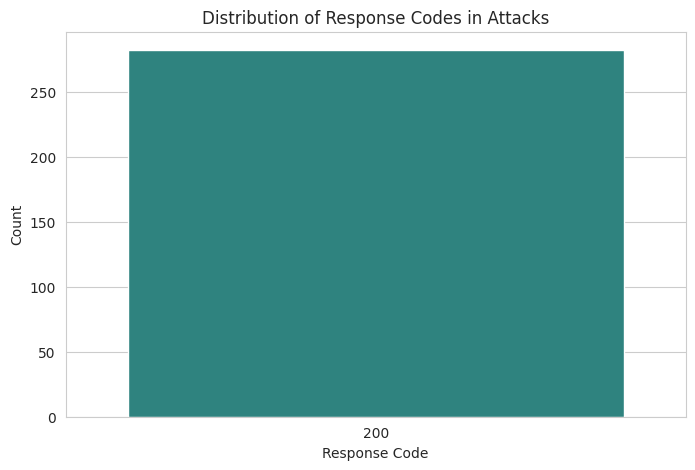

In [ ]:

# Set plot style
sns.set_style("whitegrid")

# Distribution of Response Codes
plt.figure(figsize=(8, 5))
sns.countplot(x=df['response.code'], palette="viridis")
plt.xlabel("Response Code")
plt.ylabel("Count")
plt.title("Distribution of Response Codes in Attacks")
plt.show()


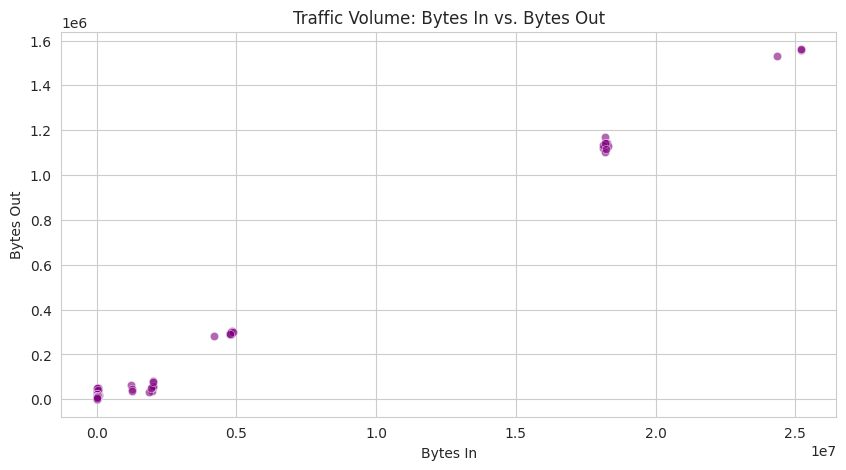

In [ ]:
# Traffic Volume Analysis (Bytes In vs Bytes Out)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['bytes_in'], y=df['bytes_out'], alpha=0.6, color='purple')
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.title("Traffic Volume: Bytes In vs. Bytes Out")
plt.show()

<ipython-input-50-3b8692f08420>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['protocol'], palette="coolwarm", order=df['protocol'].value_counts().index)


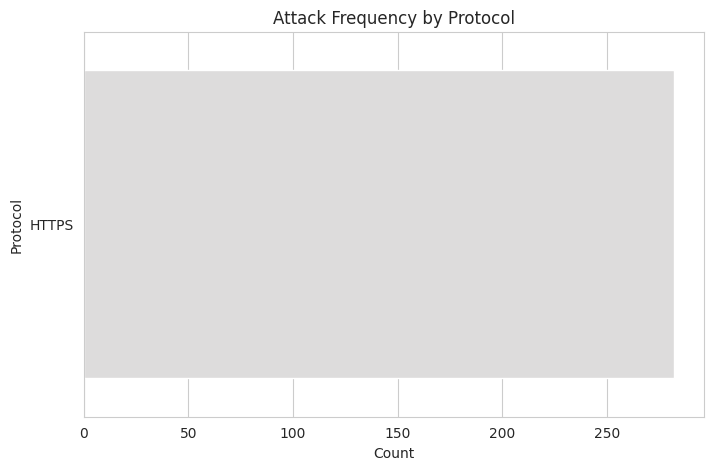

In [ ]:

# Attack Frequency by Protocol
plt.figure(figsize=(8, 5))
sns.countplot(y=df['protocol'], palette="coolwarm", order=df['protocol'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Protocol")
plt.title("Attack Frequency by Protocol")
plt.show()

<ipython-input-52-3d331e290917>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette="magma")


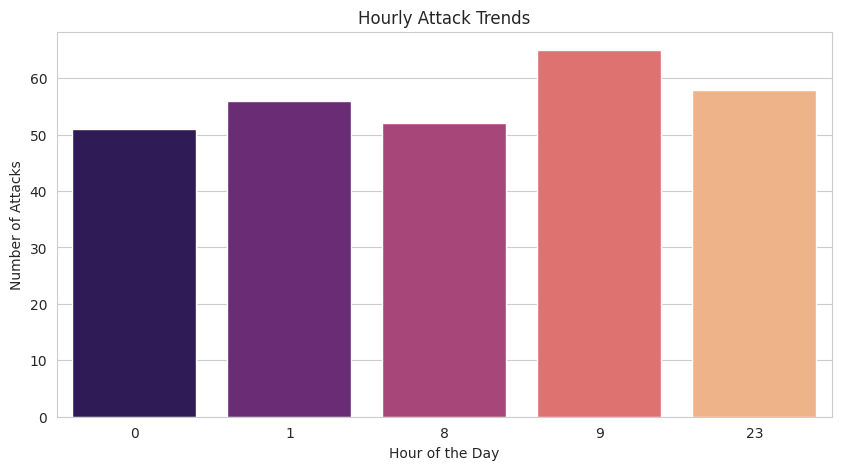

In [ ]:
# Hourly Attack Trend Analysis
# Hourly Attack Trend Analysis
df['hour'] = df['creation_time'].dt.hour  # Use 'creation_time' instead of 'time'
plt.figure(figsize=(10, 5))
sns.countplot(x=df['hour'], palette="magma")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Attacks")
plt.title("Hourly Attack Trends")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("CloudWatch_Traffic_Web_Attack.csv")  # Update the path if needed

# Selecting relevant features (numeric + categorical for encoding)
features = ['bytes_in', 'bytes_out', 'response.code', 'dst_port']
target = 'observation_name'  # Assuming we predict attack type

# Encoding categorical target variable
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df[target])

# Extracting features and target
X = df[features].values
y = df['target_encoded'].values

# Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

# Evaluating Model Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/20
29

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
file_path = "CloudWatch_Traffic_Web_Attack.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# Drop irrelevant columns
columns_to_drop = ["src_ip", "dst_ip", "creation_time", "end_time", "time", "source.meta", "source.name", "dst_ip"]
df_cleaned = df.drop(columns=columns_to_drop)

# Encode categorical variables
label_encoders = {}
categorical_columns = ["protocol", "src_ip_country_code", "rule_names", "observation_name", "detection_types"]

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for later decoding if needed

# Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = ["bytes_in", "bytes_out", "response.code", "dst_port"]
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Separate features and target
X = df_cleaned.drop(columns=["detection_types"])  # Features
y = df_cleaned["detection_types"]  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the model
model.save("traffic_attack_nn_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2482 - loss: 0.7940 - val_accuracy: 1.0000 - val_loss: 0.5253
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.4748 - val_accuracy: 1.0000 - val_loss: 0.3227
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.2974 - val_accuracy: 1.0000 - val_loss: 0.2157
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.2068 - val_accuracy: 1.0000 - val_loss: 0.1559
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.1595 - val_accuracy: 1.0000 - val_loss: 0.1194
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.1284 - val_accuracy: 1.0000 - val_loss: 0.0945
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0885 - val_accuracy: 1.0000 - val_loss: 0.0773
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0690 - val_accuracy: 1.0000 - va

Test Accuracy: 1.0000


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
file_path = "CloudWatch_Traffic_Web_Attack.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Select only relevant columns
df = df[["bytes_in", "bytes_out", "detection_types"]]

# Encode the target variable
le = LabelEncoder()
df["detection_types"] = le.fit_transform(df["detection_types"])

# Normalize numerical features
scaler = MinMaxScaler()
df[["bytes_in", "bytes_out"]] = scaler.fit_transform(df[["bytes_in", "bytes_out"]])

# Separate features and target
X = df[["bytes_in", "bytes_out"]]
y = df["detection_types"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(2,)),  # 2 inputs (bytes_in, bytes_out)
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the model
model.save("bytes_in_out_nn_model.h5")


FileNotFoundError: [Errno 2] No such file or directory: 'CloudWatch_Traffic_Web_Attack.csv'

In [ ]:
python app.py

curl -X POST "http://127.0.0.1:5000/predict" -H "Content-Type: application/json" -d '[
    {"feature1": 1.2, "feature2": 3.4, "feature3": 5.6},
    {"feature1": 2.3, "feature2": 4.5, "feature3": 6.7}
]'

{
    "prediction": [0, 1]
}


SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-6-788ac19cf6e7>, line 3)